In [5]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels
import numpy as np
import scipy as sc
import math
from collections import Counter
import sklearn

import numpy as np

from scipy.special import gamma,psi
from scipy import ndimage
from scipy.linalg import det
from numpy import pi

from sklearn.neighbors import NearestNeighbors

In [29]:
data = pd.read_csv('Test.csv').astype(float)
n = data.values

t = np.ravel(n)

print (t)

[ 1.  1.  1.  2.]


In [35]:
def entropy(signal):
        '''
        function returns entropy of a signal
        signal must be a 1-D numpy array
        '''
        lensig=signal.size
        symset=list(set(signal))
        numsym=len(symset)
        propab=[np.size(signal[signal==i])/(1.0*lensig) for i in symset]
        ent=np.sum([p*np.log2(1.0/p) for p in propab])
        return ent

print (entropy(t))

0.811278124459


In [43]:
def entropy(signal):
        '''
        function returns entropy of a signal
        signal must be a 1-D numpy array
        '''
        lensig=signal.size
        symset=list(set(signal))
        numsym=len(symset)
        propab=[np.size(signal[signal==i])/(1.0*lensig) for i in symset]
        ent=np.sum([p*np.log2(1/p) for p in propab])
        return ent

print (entropy(t))

0.811278124459


In [14]:
colorIm=Image.open('Test.JPG')
greyIm=colorIm.convert('L')
colorIm=np.array(colorIm)
greyIm=np.array(greyIm)

In [15]:
N=5
S=greyIm.shape
E=np.array(greyIm)
for row in range(S[0]):
        for col in range(S[1]):
                Lx=np.max([0,col-N])
                Ux=np.min([S[1],col+N])
                Ly=np.max([0,row-N])
                Uy=np.min([S[0],row+N])
                region=greyIm[Ly:Uy,Lx:Ux].flatten()
                E[row,col]=entropy(region)

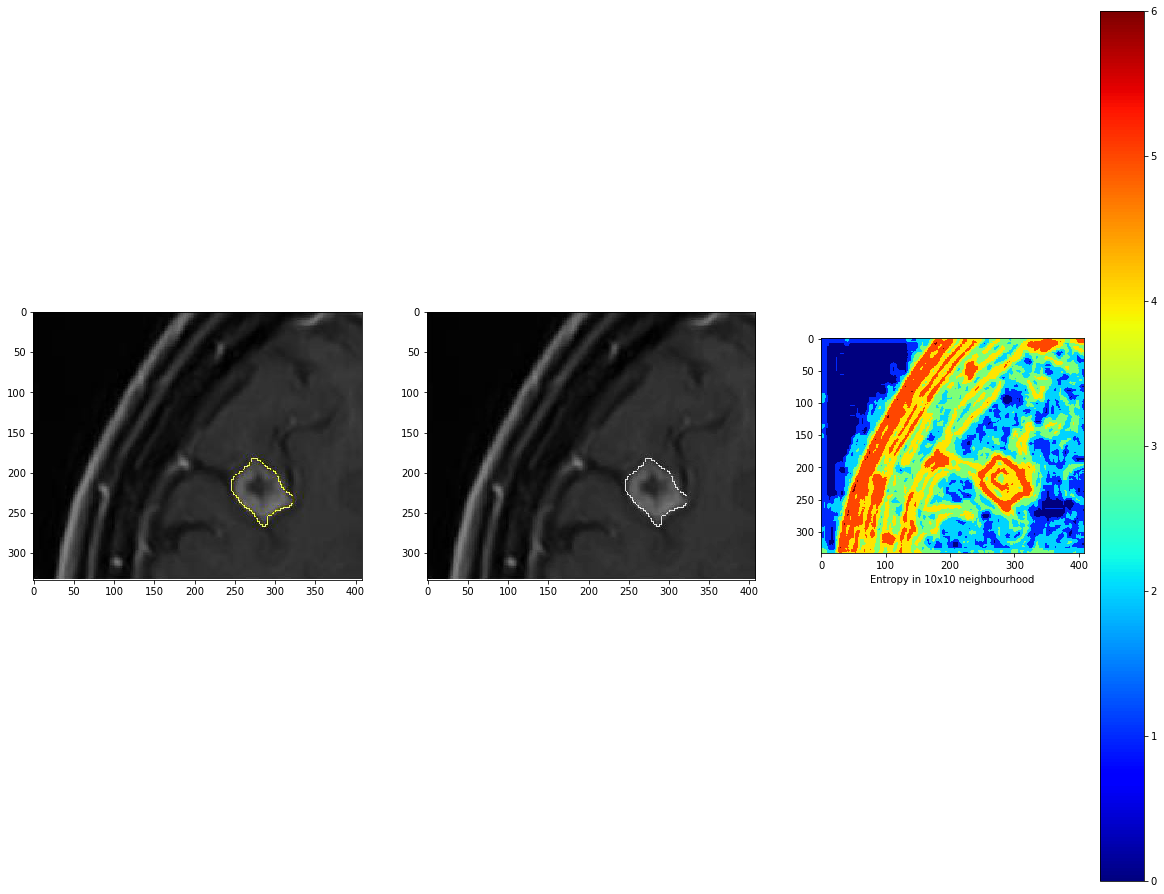

In [28]:

plt.figure(figsize=(20, 16))
plt.subplot(1,3,1)
plt.imshow(colorIm)

plt.subplot(1,3,2)
plt.imshow(greyIm, cmap=plt.cm.gray)


plt.subplot(1,3,3)
plt.imshow(E, cmap=plt.cm.jet)
plt.xlabel('Entropy in 10x10 neighbourhood')
plt.colorbar()

plt.show()